In [1]:
import pandas as pd

### Task 1:

Read the dataset from the below link

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Names_right.csv')
data.head(10)

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41
5,11354,11355,Abigail,2004,F,AK,37
6,11355,11356,Olivia,2004,F,AK,33
7,11356,11357,Isabella,2004,F,AK,30
8,11357,11358,Alyssa,2004,F,AK,29
9,11358,11359,Sophia,2004,F,AK,28


#### Delete unnamed columns

In [3]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)

#### Show the distribution of male and female

In [4]:
data.groupby(['Gender']).count()


,Id,Name,Year,State,Count
Gender,,,,,
F,558846,558846,558846,558846,558846
M,457549,457549,457549,457549,457549


#### Show the top 5 most preferred names

In [5]:
name = data.groupby(['Name'])
d = name['Name'].count().reset_index(name='counts')
d.sort_values(by=['counts'],ascending=False).head(5)


,Name,counts
14062,Riley,1112
2174,Avery,1080
8500,Jordan,1073
13459,Peyton,1064
6584,Hayden,1049


#### What is the median name occurence in the dataset

In [6]:
from numpy import median
median_name_index=median(list(data.index.get_values()))
d = data.loc[508197:508197,'Name'] 
print(d)


508197    Kasey
Name: Name, dtype: object


#### Distribution of male and female born count by states

In [7]:
gender_counts = data.groupby(['Gender','State']).size()
gender_counts.rename('statewise_count').reset_index()

,Gender,State,statewise_count
0,F,AK,2404
1,F,AL,9878
2,F,AR,7171
3,F,AZ,14518
4,F,CA,45144
5,F,CO,11424
6,F,CT,6575
7,F,DC,3053
8,F,DE,2549
9,F,FL,25781


#### Task:
<li>
1. fitting it to the periodic function
</li>
<li>
2. plot the fit
</li><br>
Data
<li>
Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25
</li>
<li>
Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18
</li>

In [9]:
import numpy as np

temp_max = np.array([17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18])
temp_min = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])

import matplotlib.pyplot as plt
months = np.arange(12)
plt.plot(months, temp_max, 'ro')
plt.plot(months, temp_min, 'bo')
plt.xlabel('Month')
plt.ylabel('Min and max temperature')

Text(0,0.5,'Min and max temperature')

In [10]:
from scipy import optimize

def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months,
                                      temp_max, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,
                                      temp_min, [-40, 20, 0])

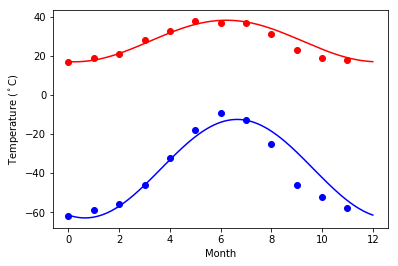

In [11]:
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, temp_max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, temp_min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()